In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json
import missingno as msno

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('C:/Users/user/1/Downloads/dataset_for_datascience_assignment.csv')
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [3]:
df.set_index('USER_ID', inplace=True)

In [4]:
df.shape

(21983, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21983 entries, 1 to 21983
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   BREAKFAST_PURCHASES                      12028 non-null  float64
 8   LUNCH_PURCHASES                          12028 non-null  float64
 9   EVENING_PURCHASES                        12028 non-null  float64
 10  DINNER_PURCHASES                         12028

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
4,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


## DATA CLEANING
----

In [7]:
df['PURCHASE_COUNT_BY_STORE_TYPE'].values

array(['{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 1,\n  "Grocery": 9,\n  "Pet supplies": 0,\n  "Restaurant": 9,\n  "Retail store": 0\n}',
       ...,
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}',
       '{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 1,\n  "Retail store": 0\n}'],
      dtype=object)

The column `PURCHASE_COUNT_BY_STORE_TYPE` needs to expand in order to create five new columns that represent the respective store type

In [8]:
df['PURCHASE_COUNT_BY_STORE_TYPE'] = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: json.loads(x.replace('\n', '').replace(' ', '')))

expanded_df = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(pd.Series)
df = pd.concat([df, expanded_df], axis=1)

df.drop('PURCHASE_COUNT_BY_STORE_TYPE', axis=1, inplace=True)
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
4,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
5,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [9]:
# We will turn the following variables into their appropriate data type (datetime)
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21983 entries, 1 to 21983
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   BREAKFAST_PURCHASES                      12028 non-null  float64       
 8   LUNCH_PURCHASES                          12028 non-null  float64       
 9   EVENING_PURCHASES                      

In [10]:
df.isnull().sum()

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES                               9955
ANDROID_PURCHASES   

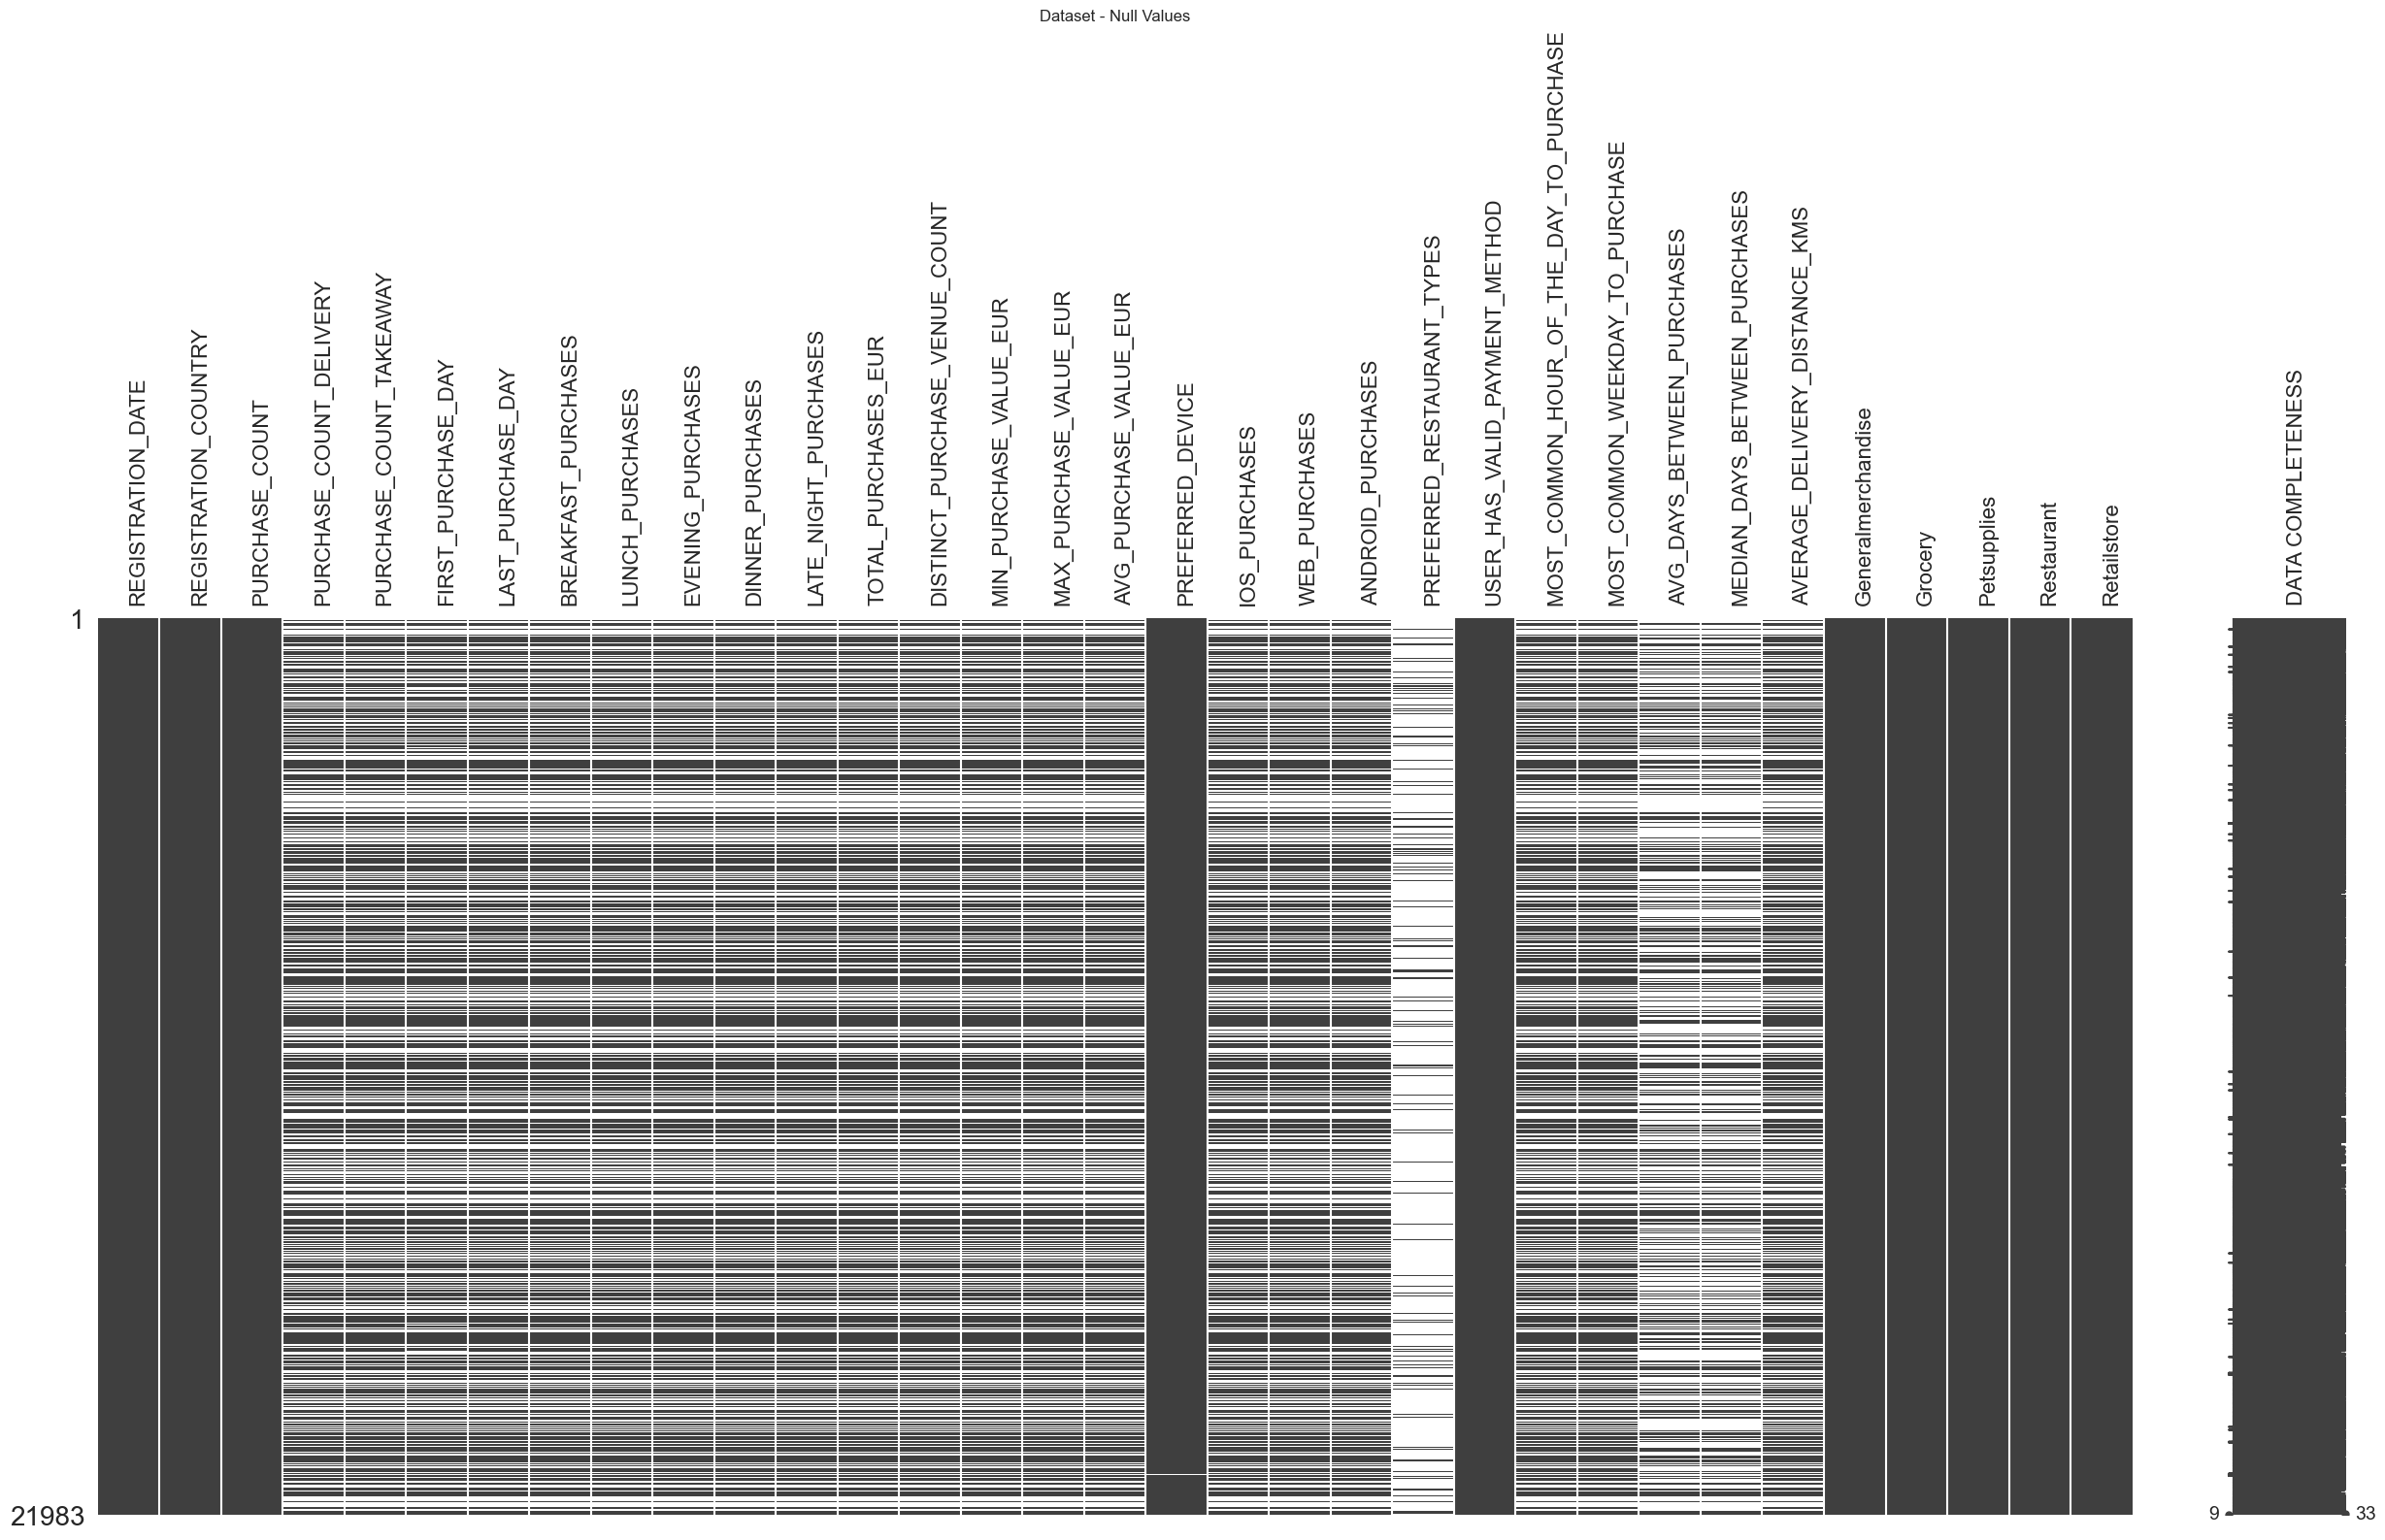

In [11]:
msno.matrix(df, labels=True, figsize=(30,12), label_rotation=90)
plt.title('Dataset - Null Values')
plt.show()

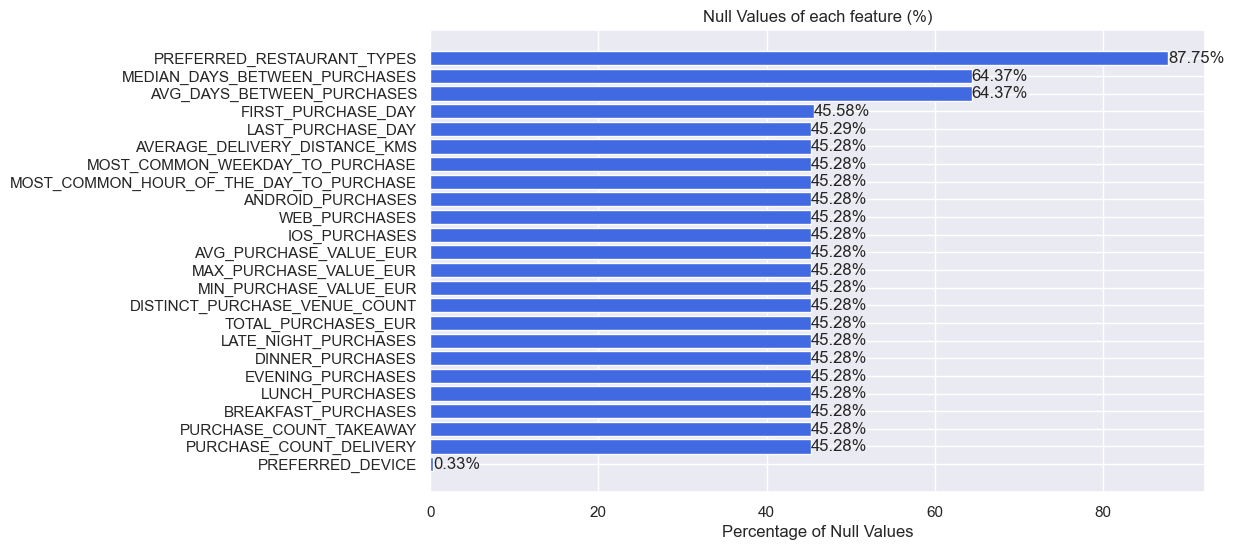

In [12]:
null_percentage = {}
for col in df.columns:
    sum_null = df[col].isnull().sum()
    sum_null_perc = 100 * sum_null / df.shape[0]
    if sum_null_perc != 0:
        null_percentage[col] = round(sum_null_perc, 2)
    else:
        continue

sorted_null_percentage = {k: v for k, v in sorted(null_percentage.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_null_percentage)), list(sorted_null_percentage.values()), align='center', color='royalblue')

plt.yticks(range(len(sorted_null_percentage)), list(sorted_null_percentage.keys()))
plt.xlabel('Percentage of Null Values')
plt.title('Null Values of each feature (%)')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{list(sorted_null_percentage.values())[i]}%', va='center', ha='left')

plt.show()


As we take a first look at the data we observe that there are a lot of NaN values. However, we can notice that customers who have PURCHASE_COUNT equal to zero, which means that they have not completed an order, is the reason why the majority of NaN values exist.

Consequently, we conclude that the majority of these NaN values is due to these members.

In [13]:
df[df['PURCHASE_COUNT']!=0].isnull().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                           64
LAST_PURCHASE_DAY                             1
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              1
IOS_PURCHASES                                 0
WEB_PURCHASES                                 0
ANDROID_PURCHASES                       

Now, it's clear that NaN values have disappeared in most of our features, except `PREFERRED_RESTAURANT_TYPES`, `AVG_DAYS_BETWEEN_PURCHASES` & `MEDIAN_DAYS_BETWEEN_PURCHASES` which is still a significant number.

### `PREFERRED_RESTAURANT_TYPE` - DATA CLEANING

In [14]:
# PREFERRED_RESTAURANT_TYPE
pd.set_option('display.max_rows', None)
df['PREFERRED_RESTAURANT_TYPES'].value_counts()

[\n  "american"\n]                                                                                   658
[\n  "japanese"\n]                                                                                   367
[\n  "italian"\n]                                                                                    345
[\n  "mexican"\n]                                                                                    175
[\n  "american",\n  "italian"\n]                                                                     131
[\n  "indian"\n]                                                                                     111
[\n  "american",\n  "italian",\n  "mexican"\n]                                                        62
[\n  "middle eastern"\n]                                                                              58
[\n  "italian",\n  "american"\n]                                                                      51
[\n  "american",\n  "japanese"\n]                      

The 87.75% of the column PREFERRED_RESTAURANT_TYPE contains NaN values. If we exclude the customers that have never ordered from Wolt the 77.84% of the active members have not expressed their preferred cuisine. That's why we will convert the column into a binary variable ('Yes'/'No' values) which will represent if a customer has a preferred restaurant type.  
In other words, all NaN values will take the label 'No' and the rest of customers the label 'Yes'.

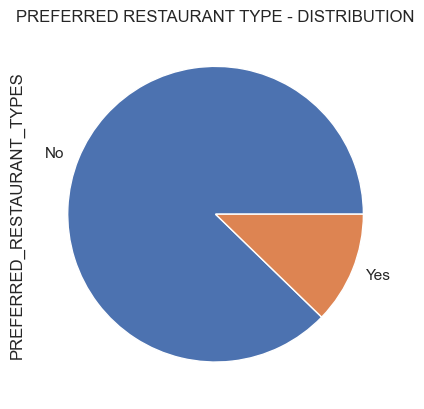

In [15]:
df['PREFERRED_RESTAURANT_TYPES'] = df['PREFERRED_RESTAURANT_TYPES'].fillna('No')
df['PREFERRED_RESTAURANT_TYPES'] = np.where(df['PREFERRED_RESTAURANT_TYPES']=='No', 'No', 'Yes')
df['PREFERRED_RESTAURANT_TYPES'].value_counts().plot.pie()
plt.title('PREFERRED RESTAURANT TYPE - DISTRIBUTION')
plt.show()

### `AVG_DAYS_BETWEEN_PURCHASES` - DATA CLEANING  
This metric measures the average days between 2 orders. For example if a user make 1 order every 7 days, the value of this feature will be 7. However, inactive users have never purchased anything, so it will be meaningful to replace NaN to those users. Same case with the active users who have completed exactly one purchase.  

Consequently, **we will keep NaN values to those users**.

In [16]:
a = df[df['PURCHASE_COUNT']==1].shape[0]
b = df[df['PURCHASE_COUNT']!=0]['AVG_DAYS_BETWEEN_PURCHASES'].isnull().sum()
c = df[df['PURCHASE_COUNT']!=0]['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull().sum()

d = b-a
e = c-a
print(f'Users with exactly one purchase:  {a}')
print(f'Active Members with NaN in the column "AVG_DAYS_BETWEEN_PURCHASES" {b}')
print(f'Active Members with NaN in the column "MEDIAN_DAYS_BETWEEN_PURCHASES" {c}')

print("")
print(f"Expected NaN values that we should replace in the column 'AVG_DAYS_BETWEEN_PURCHASES': {d}")
print(f"Expected NaN values that we should replace in the column 'MEDIAN_DAYS_BETWEEN_PURCHASES': {e}")

Users with exactly one purchase:  4179
Active Members with NaN in the column "AVG_DAYS_BETWEEN_PURCHASES" 4196
Active Members with NaN in the column "MEDIAN_DAYS_BETWEEN_PURCHASES" 4196

Expected NaN values that we should replace in the column 'AVG_DAYS_BETWEEN_PURCHASES': 17
Expected NaN values that we should replace in the column 'MEDIAN_DAYS_BETWEEN_PURCHASES': 17


In [17]:
print(df[df['PURCHASE_COUNT']>1]['AVG_DAYS_BETWEEN_PURCHASES'].isnull().sum())
print(df[df['PURCHASE_COUNT']>1]['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull().sum())

17
17


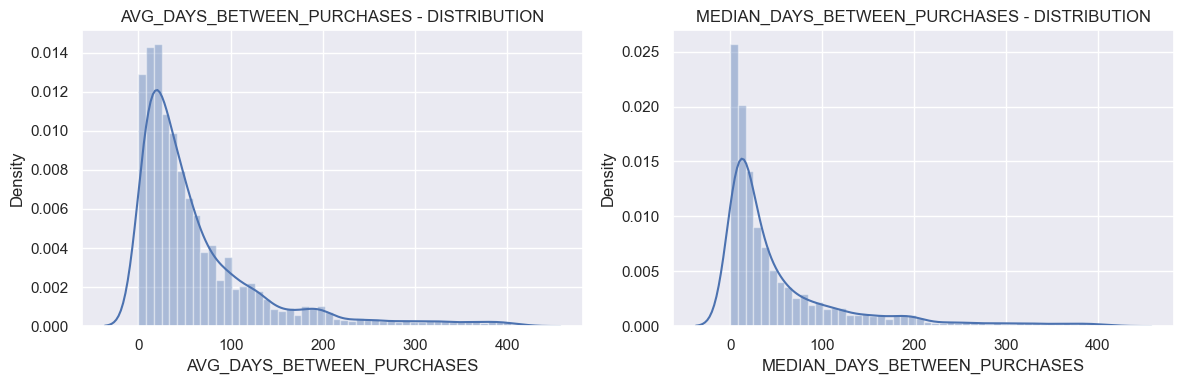

In [18]:
# MEDIAN_DAYS_BETWEEN_PURCHASES
# AVG_DAYS_BETWEEN_PURCHASES

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['AVG_DAYS_BETWEEN_PURCHASES'])
plt.title('AVG_DAYS_BETWEEN_PURCHASES - DISTRIBUTION')
plt.subplot(1,2,2)
sns.distplot(df['MEDIAN_DAYS_BETWEEN_PURCHASES'])
plt.title('MEDIAN_DAYS_BETWEEN_PURCHASES - DISTRIBUTION')
plt.tight_layout()
plt.show()

Since the distribution of these 2 continuous variables have a positive skewness, we will replace those 17 NaN values with the median of the respective feature.

In [19]:
data = df['PURCHASE_COUNT'] > 1

df.loc[data, 'AVG_DAYS_BETWEEN_PURCHASES'] = df.loc[data, 'AVG_DAYS_BETWEEN_PURCHASES'].fillna(
    df['AVG_DAYS_BETWEEN_PURCHASES'].median())

df.loc[data, 'MEDIAN_DAYS_BETWEEN_PURCHASES'] = df.loc[data, 'MEDIAN_DAYS_BETWEEN_PURCHASES'].fillna(
    df['MEDIAN_DAYS_BETWEEN_PURCHASES'].median())

In [20]:
print(df[df['PURCHASE_COUNT']>1]['AVG_DAYS_BETWEEN_PURCHASES'].isnull().sum())
print(df[df['PURCHASE_COUNT']>1]['MEDIAN_DAYS_BETWEEN_PURCHASES'].isnull().sum())

0
0


### `FIRST_PURCHASE_DAY`, `LAST_PURCHASE_DAY`, & `PREFERRED_DEVICE` - DATA CLEANING

In [21]:
df.drop(index=df[(df['PURCHASE_COUNT'] != 0) & (df['FIRST_PURCHASE_DAY'].isna())].index, inplace=True)
df.drop(index=df[(df['PURCHASE_COUNT'] != 0) & (df['LAST_PURCHASE_DAY'].isna())].index, inplace=True)
df.drop(index=df[(df['PURCHASE_COUNT'] != 0) & (df['PREFERRED_DEVICE'].isna())].index, inplace=True)

print(df.shape)
df.head()


(21918, 33)


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,No,False,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,No,True,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
4,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
5,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


### Active Vs Inactive Users

We will approach the analysis dividing the dataset to members that have completed at least one order and those who have just registered but they are not active. This approach will make our analysis easier in both data cleaning and data exploration as well.

Number of members with 0 orders: 9955
Number of members with at least 1 order: 11963



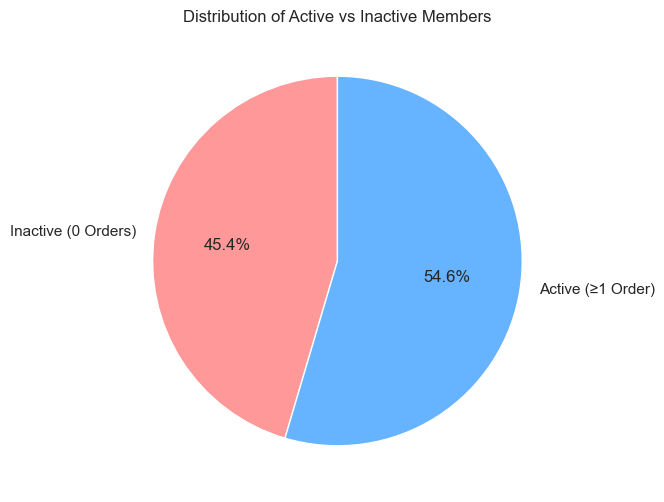

In [22]:
inactive_members = df[df['PURCHASE_COUNT']==0]
active_members = df[df['PURCHASE_COUNT']!=0]

print(f'Number of members with 0 orders: {inactive_members.shape[0]}')
print(f'Number of members with at least 1 order: {active_members.shape[0]}')
print("")

sizes = [inactive_members.shape[0], active_members.shape[0]]
labels = ['Inactive (0 Orders)', 'Active (≥1 Order)']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Active vs Inactive Members')
plt.show()

In [23]:
active_members.isnull().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                            0
LAST_PURCHASE_DAY                             0
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              0
IOS_PURCHASES                                 0
WEB_PURCHASES                                 0
ANDROID_PURCHASES                       

As we see, we have completed NaN handling in almost all our features of the dataset, except of the (average/median) days between purchases. These NaN values represent the users who have completed a purchase exactly once.

## EXPLORATORY DATA ANALYSIS
----

In [26]:
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,No,False,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,No,True,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
4,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
5,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [35]:
numeric = df.select_dtypes(include=['float', 'int']).columns
numeric

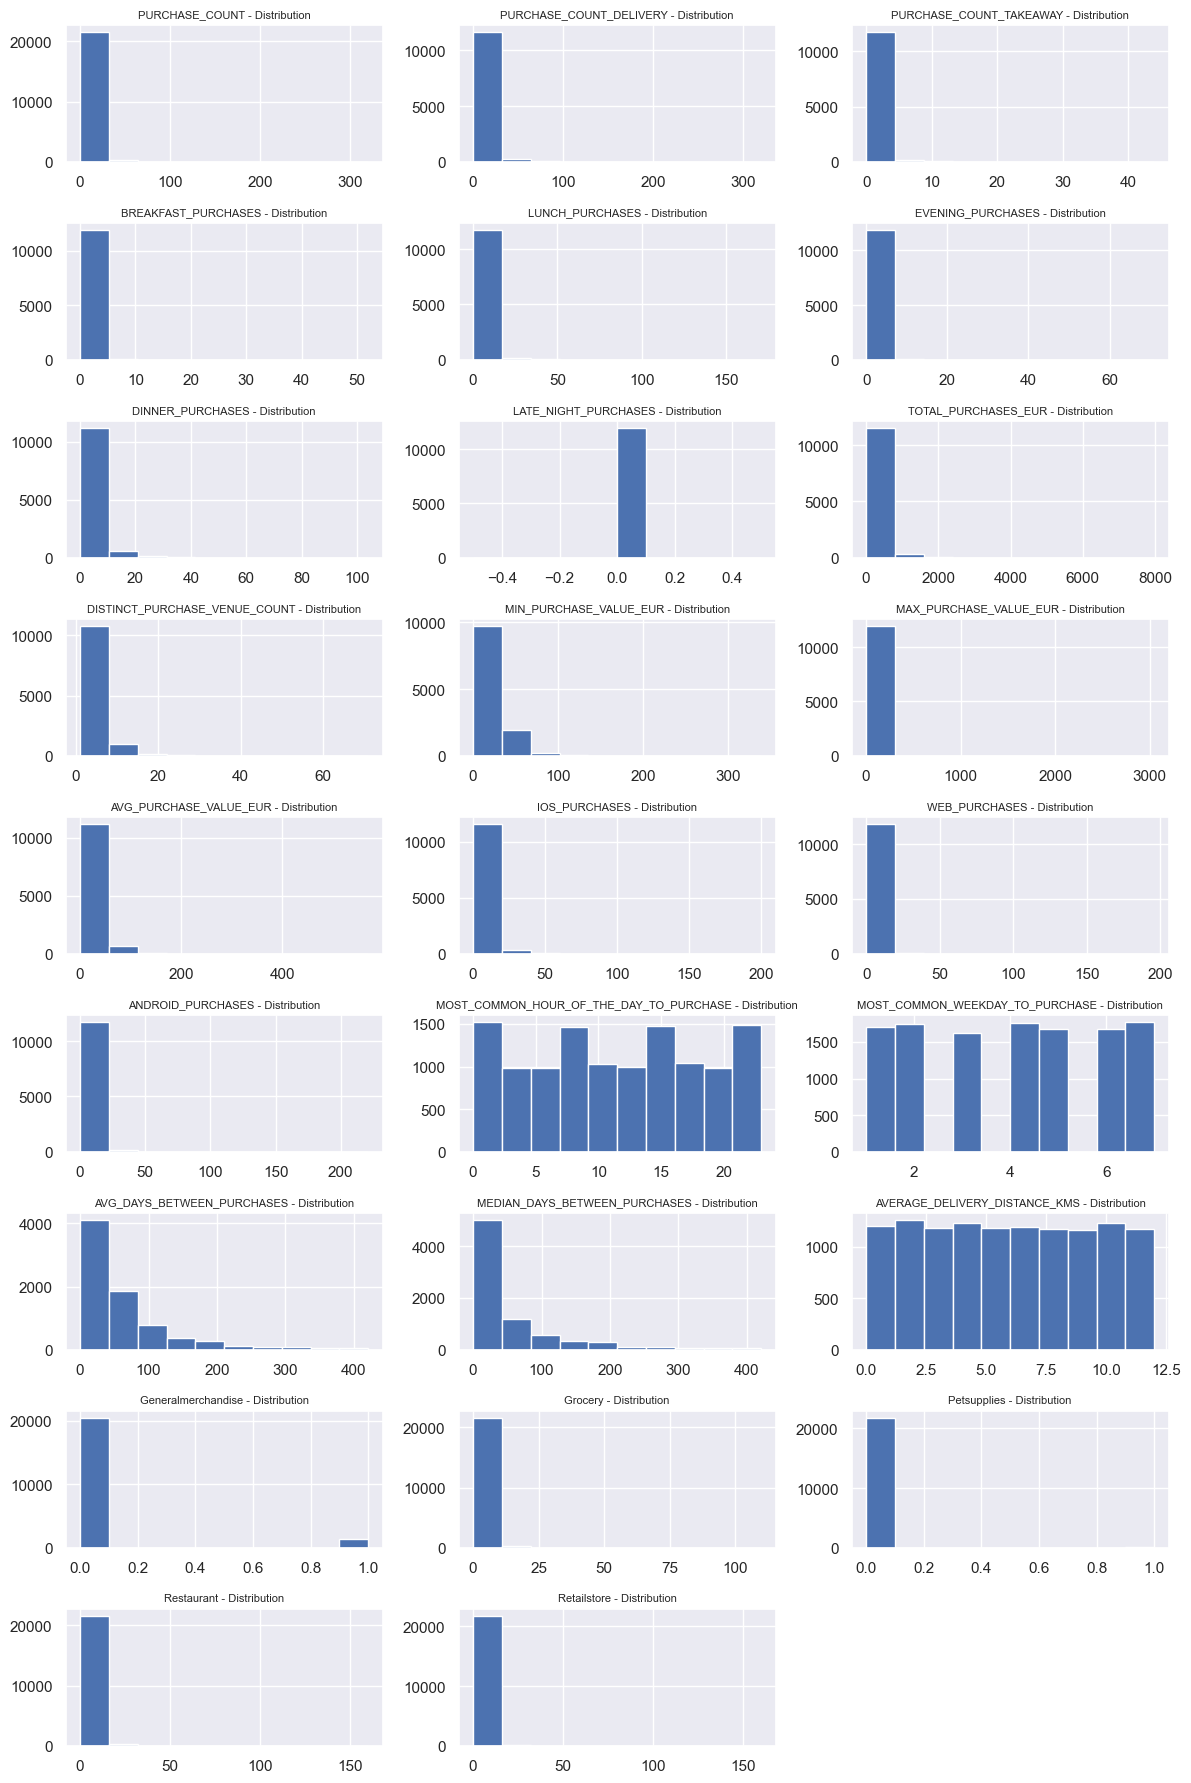

In [44]:
plt.figure(figsize=(12,18))
for i, col in enumerate(numeric, 1):
    plt.subplot(9,3,i)
    plt.hist(df[col])
    plt.title(f'{col} - Distribution', fontsize=8)

plt.tight_layout()
plt.show()

Almost every numeric variable in the dataset includes extreme values (outliers). That means the majority of the users (as it seems in the first histogram) have not completed more than 2 orders

In [62]:
df['PURCHASE_COUNT'].quantile(0.95)

16.0

In [45]:
# LATE_NIGHT_PURCHASES
print(df['LATE_NIGHT_PURCHASES'].value_counts())
# Since no one has ever completed a late night purchase we will drop this variable because it doesn't give us any information.
df.drop('LATE_NIGHT_PURCHASES', axis=1, inplace=True)

0.0    11963
Name: LATE_NIGHT_PURCHASES, dtype: int64

11963

In [24]:
# REGISTRATION_DATE
df.REGISTRATION_DATE.describe()

count                   21918
unique                     30
top       2019-09-07 00:00:00
freq                     1227
first     2019-09-01 00:00:00
last      2019-09-30 00:00:00
Name: REGISTRATION_DATE, dtype: object

The dataset contains all Wolt's registrations of September 2019 (2019-09-01 to 2019-09-30).

In [25]:
# TOTAL_PURCHASES_EUR
total_income = df['TOTAL_PURCHASES_EUR'].sum()
print(f'Total Income in September: ${total_income:.2f}')

Total Income in September: $2111295.12


In [286]:
# REGISTRATION_COUNTRY
df.REGISTRATION_COUNTRY.value_counts()

FIN    10261
DNK     8034
GRC     3040
USA       70
GBR       54
SWE       45
EST       44
DEU       39
NOR       34
ITA       24
POL       23
LTU       22
ESP       19
CZE       14
HUN       11
AUS       11
BEL       11
FRA       11
NLD       10
ISR        9
RUS        8
IND        7
LVA        7
BRA        7
IRL        7
CYP        7
CAN        6
ARE        6
JPN        6
QAT        6
PRT        5
ROU        5
HRV        5
AUT        5
CHE        4
SGP        4
FRO        3
SVK        3
CHN        3
TUR        2
LBN        2
JOR        2
CHL        2
UKR        2
ISL        2
COL        2
AZE        2
KOR        1
PHL        1
SAU        1
PAK        1
TWN        1
GEO        1
MEX        1
HKG        1
GIN        1
KWT        1
MLT        1
SVN        1
Name: REGISTRATION_COUNTRY, dtype: int64

In [287]:
# Group the 'REGISTRATION_COUNTRY' feature in 4 groups
df['REGISTRATION_COUNTRY'] = np.where(df['REGISTRATION_COUNTRY'].isin(['FIN', 'DNK', 'GRC']), df['REGISTRATION_COUNTRY'], 'Other')
df['REGISTRATION_COUNTRY'].value_counts()

FIN      10261
DNK       8034
GRC       3040
Other      583
Name: REGISTRATION_COUNTRY, dtype: int64

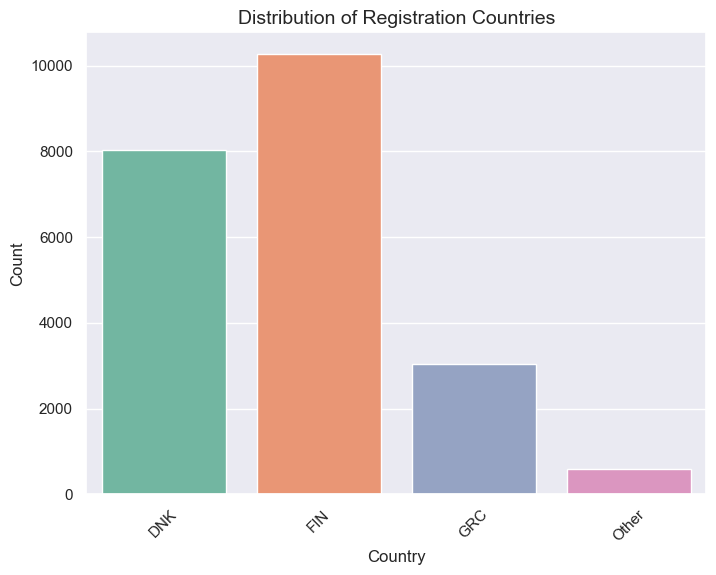

In [308]:
plt.figure(figsize=(8, 6))
sns.countplot(x='REGISTRATION_COUNTRY', data=df, palette='Set2')

plt.title('Distribution of Registration Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)  
plt.show()

In [318]:
numeric = active_members.select_dtypes(include=['float', 'int']).columns

Index(['PURCHASE_COUNT', 'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'USER_ID', 'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES',
       'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES',
       'TOTAL_PURCHASES_EUR', 'DISTINCT_PURCHASE_VENUE_COUNT',
       'MIN_PURCHASE_VALUE_EUR', 'MAX_PURCHASE_VALUE_EUR',
       'AVG_PURCHASE_VALUE_EUR', 'IOS_PURCHASES', 'WEB_PURCHASES',
       'ANDROID_PURCHASES', 'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'Generalmerchandise', 'Grocery', 'Petsupplies', 'Restaurant',
       'Retailstore'],
      dtype='object')

In [320]:
active_members.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,No,False,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,No,True,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
7,2019-09-01,FIN,1,1.0,0.0,2020-10-14,2020-10-14,8,0.0,0.0,1.0,0.0,0.0,19.228,1.0,19.266,19.304,19.228,android,0.0,0.0,1.0,No,True,5.0,1.0,NaN,NaN,1.251,0,0,0,1,0
12,2019-09-01,FIN,19,19.0,0.0,2020-04-18,2020-10-27,13,0.0,8.0,0.0,11.0,0.0,587.972,3.0,19.266,47.752,31.372,ios,19.0,0.0,0.0,No,True,7.0,3.0,11.0,9.0,3.303,1,9,0,9,0
13,2019-09-01,FIN,2,2.0,0.0,2020-08-21,2020-09-09,14,0.0,1.0,1.0,0.0,0.0,118.404,1.0,57.798,60.960,59.708,ios,0.0,0.0,2.0,Yes,False,5.0,6.0,19.0,19.0,1.382,0,0,0,2,0


In [333]:
active_members['PREFERRED_DEVICE'].value_counts()

ios        5299
android    4091
web        2573
Name: PREFERRED_DEVICE, dtype: int64

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ios,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,0.0,1.0,0.0,0.0,0.0,38.456,1.0,38.532,38.608,38.456,android,0.0,0.0,1.0,No,False,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,14.0,0.0,631.488,9.0,20.280,43.688,33.396,android,0.0,19.0,0.0,No,True,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
4,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
5,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,android,NaN,NaN,NaN,No,False,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


<Axes: xlabel='AVERAGE_DELIVERY_DISTANCE_KMS', ylabel='Density'>

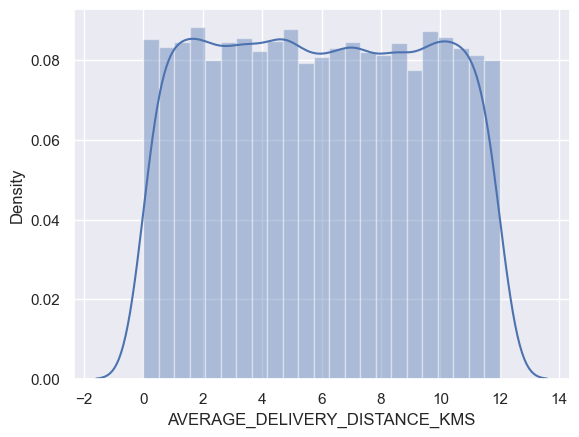

In [29]:
sns.distplot(df['AVERAGE_DELIVERY_DISTANCE_KMS'])

In [30]:
df.columns

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'BREAKFAST_PURCHASES',
       'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES',
       'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'Generalmerchandise', 'Grocery', 'Petsupplies', 'Restaurant',
       'Retailstore'],
      dtype='object')

In [31]:
# Assuming 'df' is your DataFrame
# Group by the most common weekday and sum the purchase counts
weekday_purchases = df.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE')['PURCHASE_COUNT'].sum()

# Find the weekday with the highest total number of purchases
most_common_weekday = weekday_purchases.idxmax()
print(most_common_weekday)


4.0


In [35]:
df.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE')['PURCHASE_COUNT'].count()

MOST_COMMON_WEEKDAY_TO_PURCHASE
1.0    1709
2.0    1743
3.0    1616
4.0    1763
5.0    1674
6.0    1683
7.0    1775
Name: PURCHASE_COUNT, dtype: int64

In [36]:
df.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE')['PURCHASE_COUNT'].sum()

MOST_COMMON_WEEKDAY_TO_PURCHASE
1.0    10236
2.0    10702
3.0    10485
4.0    11484
5.0     9676
6.0    10014
7.0    10754
Name: PURCHASE_COUNT, dtype: int64